In [25]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
root_dir = r'D:\cw_odmr_data\intensity_counts_0'
intensity_data = r'intensity_counts.csv'
intensity_path = os.path.join(root_dir, intensity_data)
intensity = pd.read_csv(intensity_path,skiprows=1, header=None, names=['Gate', 'Counts'])
intensity

,Gate,Counts
0,1,19
1,2,19
2,3,15
3,4,11
4,5,11
...,...,...
101644874,101646858,12
101644875,101646859,7
101644876,101646860,7
101644877,101646861,6


In [4]:
last_gate_value = intensity.iloc[-1]['Gate']
empty_df = pd.DataFrame({'Gate': range(1, 101646863),  # 从1到101646862
        'Counts': [0] * 101646862})
empty_df

,Gate,Counts
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
101646857,101646858,0
101646858,101646859,0
101646859,101646860,0
101646860,101646861,0


In [5]:
merged_df = empty_df.merge(intensity, on='Gate', how='left').fillna(0)
merged_df.to_csv('D:\cw_odmr_data\intensity_counts_0\intensity_counts_filledup.csv')

In [9]:
intensity_filledup_df = merged_df.drop('Counts_x', axis=1)
intensity_filledup_df.rename(columns={'Counts_y': 'Counts'}, inplace=True)
intensity_filledup_df

,Gate,Counts
0,1,19.0
1,2,19.0
2,3,15.0
3,4,11.0
4,5,11.0
...,...,...
101646857,101646858,12.0
101646858,101646859,7.0
101646859,101646860,7.0
101646860,101646861,6.0


In [10]:
intensity_filledup_df.shape[0]

101646862

In [17]:
sweep_list_for_analysis = pd.read_csv('D:\cw_odmr_data\sweep_list_analysis_50to550.csv', index_col=0)

analysis_list = sweep_list_for_analysis.drop(labels=0,axis=0)
freq_points = analysis_list.shape[0]
print(freq_points)
analysis_list

5001


,SN,Freq,Level,Time,Freq Offset,Level Offset
4476,4477,497.5 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
4767,4768,526.6 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
2874,2875,337.3 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
3453,3454,395.2 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
271,272,77.0 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
...,...,...,...,...,...,...
1768,1769,226.7 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
4516,4517,501.5 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
3040,3041,353.9 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz
1732,1733,223.1 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz


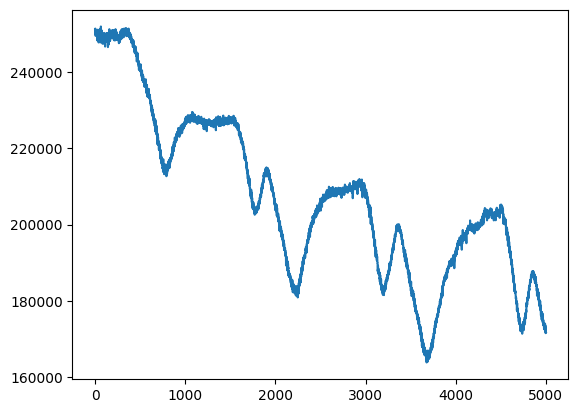

In [38]:
x = range(0,freq_points)
y=[]
for i in range(0,freq_points):
    start = i*20000
    stop = (i+1)*20000-1
    y.append(intensity_filledup_df.loc[start:stop, 'Counts'].sum())

plt.plot(x,y)
plt.show()
np.std(y[0:100])
intensity_dataframe = pd.DataFrame({'intensity': y})
intensity_dataframe.to_csv(r'D:\cw_odmr_data\20230904_cw_odmr_SiC_bulk_V1_ensemble_RF50to550MHz_tempRT_pump730nm\final_result\intensity_counts_shuffled.csv')



In [20]:
analysis_list.insert(analysis_list.shape[1],'Intensity', np.array(y))
analysis_list


,SN,Freq,Level,Time,Freq Offset,Level Offset,Intensity
4476,4477,497.5 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,251228.0
4767,4768,526.6 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,250158.0
2874,2875,337.3 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,250971.0
3453,3454,395.2 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,251458.0
271,272,77.0 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,250331.0
...,...,...,...,...,...,...,...
1768,1769,226.7 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,171940.0
4516,4517,501.5 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,171506.0
3040,3041,353.9 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,172298.0
1732,1733,223.1 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,171699.0


In [31]:
final_result = analysis_list.sort_index()
final_result.to_csv(r'D:\cw_odmr_data\20230904_cw_odmr_SiC_bulk_V1_ensemble_RF50to550MHz_tempRT_pump730nm\final_result\final_result.csv')
final_result

,SN,Freq,Level,Time,Freq Offset,Level Offset,Intensity
1,2,50.0 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,249124.0
2,3,50.1 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,196811.0
3,4,50.2 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,199938.0
4,5,50.3 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,190002.0
5,6,50.4 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,227270.0
...,...,...,...,...,...,...,...
4997,4998,549.6 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,197123.0
4998,4999,549.7 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,210467.0
4999,5000,549.8 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,212700.0
5000,5001,549.9 MHz,5.0 dBm,0.0 ms,0.0 dB,0.0Hz,182743.0


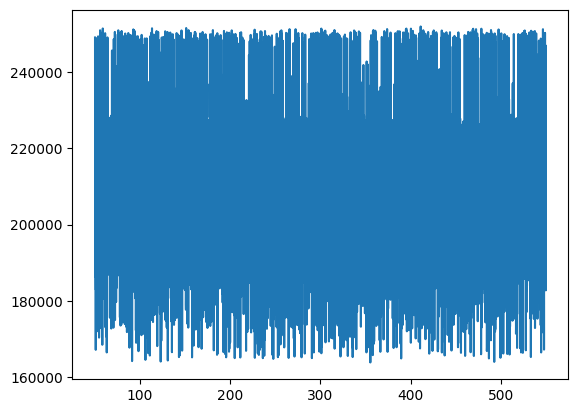

In [29]:
x_frequency = []
for items in final_result['Freq']:
    x_frequency.append(float(items[:-4]))
y_intensity = final_result['Intensity']
plt.plot(x_frequency,y_intensity)
plt.show()
